In [20]:
#importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "/Users/abigaelawino/Downloads/datasetforModel (1).xlsx"
df = pd.read_excel(url)
df = df.dropna()

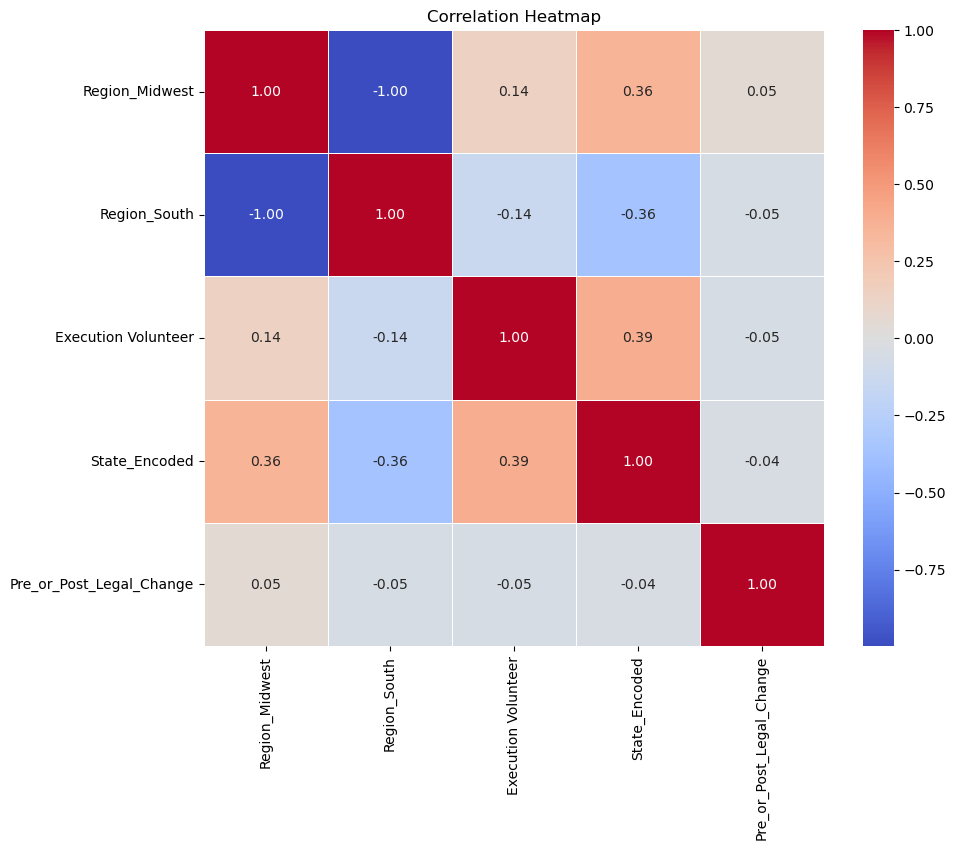

In [21]:
numerical_df = df.select_dtypes(include=['number'])

#Correlation matrix
correlation_matrix = numerical_df.corr()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

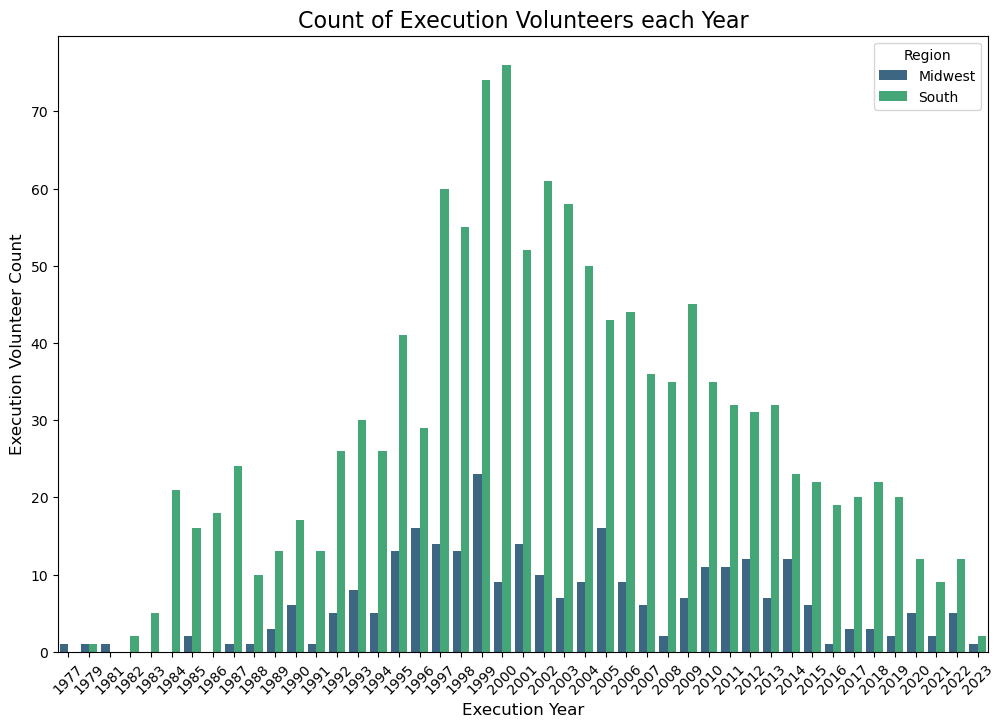

In [24]:
#other visuals
df['Execution Year'] = df['Execution Date'].dt.year

# Grouping data by Execution Year and region
region_columns = ['Region_Midwest', 'Region_South']
grouped_df = df.groupby(['Execution Year'])[region_columns + ['Execution Volunteer']].sum().reset_index()

melted_df = grouped_df.melt(id_vars='Execution Year', 
                            value_vars=['Region_Midwest', 'Region_South'], 
                            var_name='Region', 
                            value_name='Execution Volunteer Count')

# Renaming regions
melted_df['Region'] = melted_df['Region'].str.replace('Region_', '')

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_df, x='Execution Year', y='Execution Volunteer Count', hue='Region', palette='viridis')
plt.title("Count of Execution Volunteers each Year", fontsize=16)
plt.xlabel("Execution Year", fontsize=12)
plt.ylabel("Execution Volunteer Count", fontsize=12)
plt.legend(title="Region", fontsize=10)
plt.xticks(rotation=45)
plt.show()